## Encontrar el fantasma en base a sus probabilidades

In [139]:
# Se obtienen los datos del csv y se ponen en un pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Sensor_Color_Distribution.csv')
data

,dist,R,O,Y,G,B
0,0,0.30,0.00,0.00,0.00,0.00
1,1,0.27,0.01,0.00,0.00,0.00
2,2,0.21,0.03,0.00,0.00,0.00
3,3,0.13,0.08,0.00,0.00,0.00
4,4,0.06,0.15,0.01,0.00,0.00
5,5,0.02,0.22,0.03,0.00,0.00
6,6,0.01,0.23,0.08,0.00,0.00
7,7,0.00,0.15,0.15,0.00,0.00
8,8,0.00,0.08,0.22,0.01,0.00
9,9,0.00,0.04,0.23,0.03,0.00


In [140]:
# Los datos muestran la probabilidad de que un fantasma se encuentre a cierta distancia en base a el color que marca el sensor en cierta posicion.
from typing import Tuple

def prob(distance, color):
    # Se obtiene la probabilidad de que un fantasma se encuentre a cierta distancia en base a el color que marca el sensor en cierta posicion.
    return data[color].iloc[distance]

def calcDistance(pos1: Tuple[int, int], pos2: Tuple[int, int]):
    # Se calcula la distancia entre dos posiciones
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])



def calcProb( trySensors):
    tablero = np.zeros((10, 10))
    maxCell = (0, (0,0))
    sumProb = 0
    for i in range(10):
        for j in range(10):
            tablero[i, j] = 1/100
            for sensor in trySensors:
                # Se calcula la distancia entre la posicion del sensor y la posicion actual
                distance = calcDistance(sensor[0], (i, j))
                # Se calcula la probabilidad de que un fantasma se encuentre a cierta distancia en base a el color que marca el sensor en cierta posicion.
                prob_ = prob(distance, sensor[1])
                # Se multiplica la probabilidad de que un fantasma se encuentre a cierta distancia en base a el color que marca el sensor en cierta posicion.
                tablero[i, j] *= prob_ 

            if tablero[i, j] > maxCell[0]:
                maxCell = (tablero[i, j], (i, j))
    tablero = tablero / tablero.sum()
    maxCell = (tablero[maxCell[1][0], maxCell[1][1]], maxCell[1])
    # Lo hacemos un mapa de calor
    sns.heatmap(tablero)
    plt.show()
    print("La celda con mas probabilidad de que este el fantasma es: ", maxCell[1], " con una probabilidad de: ", maxCell[0])
    return tablero, maxCell


In [141]:

listTrySensors = [
    { ((5,5), 'R'), ((2,7), 'O')},
    { ((5,5), 'R'), ((2,7), 'O'), ((7,7), 'Y')},
    { ((5,5), 'R'), ((2,7), 'O'), ((7,7), 'Y'), ((8,3), 'G')},
    { ((5,5), 'R'), ((2,7), 'O'), ((7,7), 'Y'), ((8,3), 'G'), ((1,1), 'B')},
    { ((5,5), 'R'), ((2,7), 'O'), ((7,7), 'Y'), ((8,3), 'G'), ((1,1), 'B')},
    {((8,3), 'G'), ((1,1), 'B')},
    {((8,3), 'G'), ((1,1), 'B')},
    {((8,3), 'G')},
    {((1,1), 'B')},
    {((5,5), 'R')},
    {((2,7), 'O')},
    {((7,7), 'Y')},
]

----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (5, 5)  con color:  R
Sensor en la posicion:  (2, 7)  con color:  O


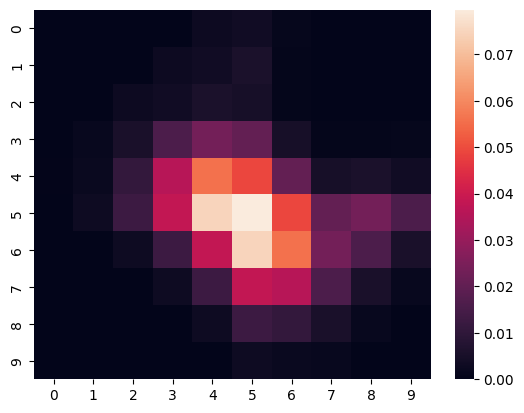

La celda con mas probabilidad de que este el fantasma es:  (5, 5)  con una probabilidad de:  0.07960439030273792
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (5, 5)  con color:  R
Sensor en la posicion:  (7, 7)  con color:  Y
Sensor en la posicion:  (2, 7)  con color:  O


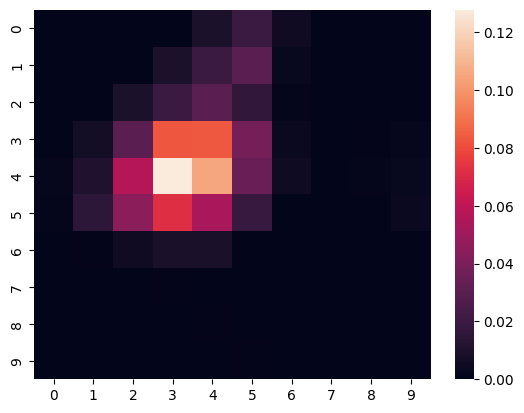

La celda con mas probabilidad de que este el fantasma es:  (4, 3)  con una probabilidad de:  0.1277559391556999
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (5, 5)  con color:  R
Sensor en la posicion:  (8, 3)  con color:  G
Sensor en la posicion:  (7, 7)  con color:  Y
Sensor en la posicion:  (2, 7)  con color:  O


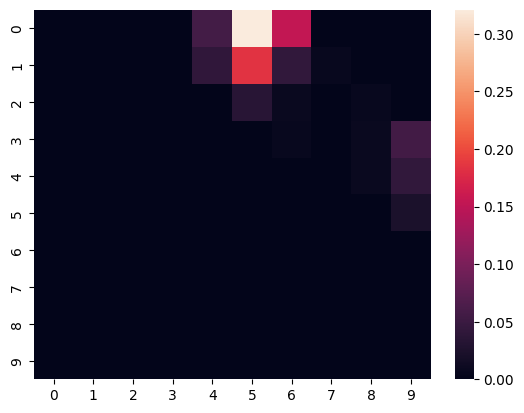

La celda con mas probabilidad de que este el fantasma es:  (0, 5)  con una probabilidad de:  0.32100488485694345
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (5, 5)  con color:  R
Sensor en la posicion:  (1, 1)  con color:  B
Sensor en la posicion:  (8, 3)  con color:  G
Sensor en la posicion:  (7, 7)  con color:  Y
Sensor en la posicion:  (2, 7)  con color:  O


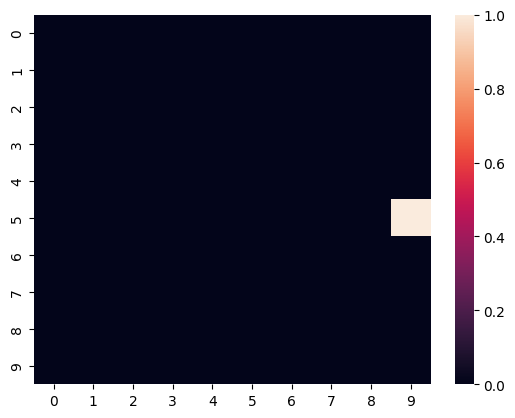

La celda con mas probabilidad de que este el fantasma es:  (5, 9)  con una probabilidad de:  1.0
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (5, 5)  con color:  R
Sensor en la posicion:  (1, 1)  con color:  B
Sensor en la posicion:  (8, 3)  con color:  G
Sensor en la posicion:  (7, 7)  con color:  Y
Sensor en la posicion:  (2, 7)  con color:  O


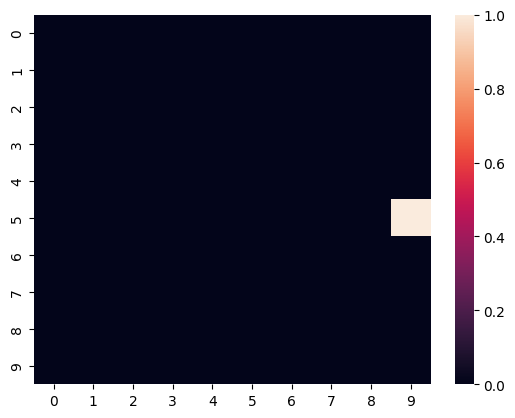

La celda con mas probabilidad de que este el fantasma es:  (5, 9)  con una probabilidad de:  1.0
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (1, 1)  con color:  B
Sensor en la posicion:  (8, 3)  con color:  G


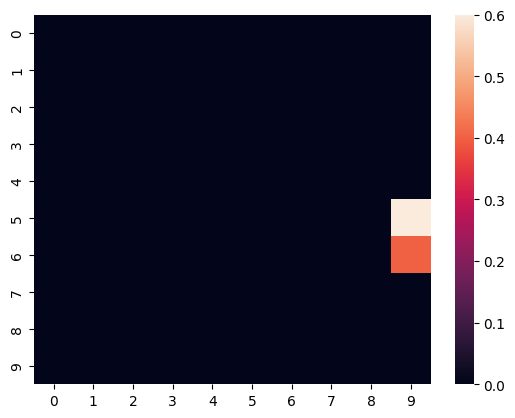

La celda con mas probabilidad de que este el fantasma es:  (5, 9)  con una probabilidad de:  0.6
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (1, 1)  con color:  B
Sensor en la posicion:  (8, 3)  con color:  G


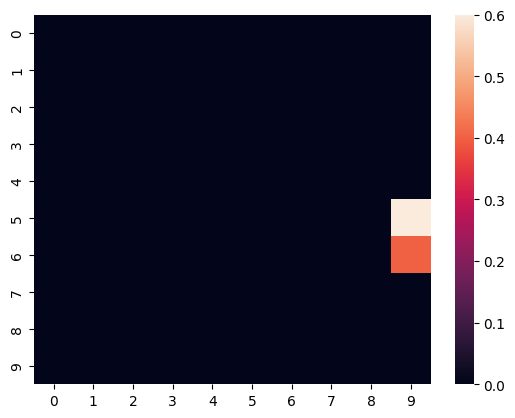

La celda con mas probabilidad de que este el fantasma es:  (5, 9)  con una probabilidad de:  0.6
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (8, 3)  con color:  G


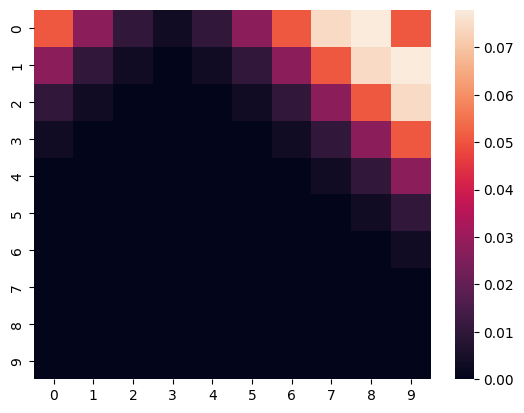

La celda con mas probabilidad de que este el fantasma es:  (0, 8)  con una probabilidad de:  0.07796610169491526
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (1, 1)  con color:  B


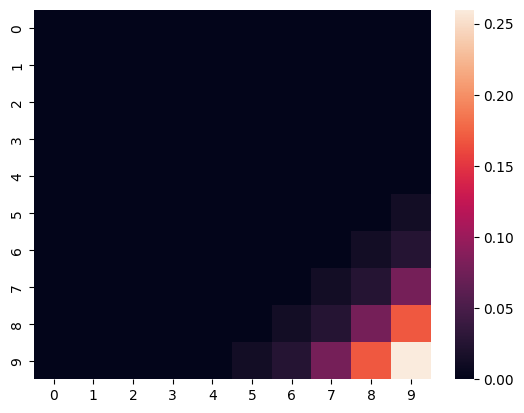

La celda con mas probabilidad de que este el fantasma es:  (9, 9)  con una probabilidad de:  0.2597402597402597
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (5, 5)  con color:  R


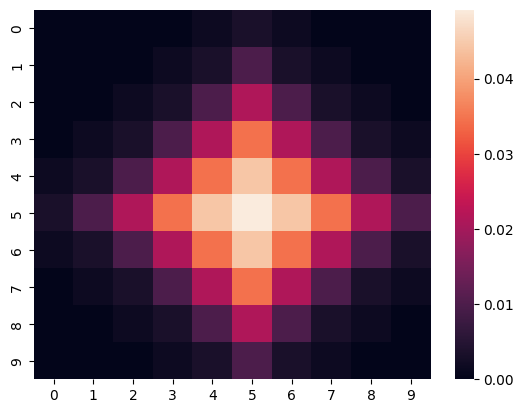

La celda con mas probabilidad de que este el fantasma es:  (5, 5)  con una probabilidad de:  0.04918032786885246
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (2, 7)  con color:  O


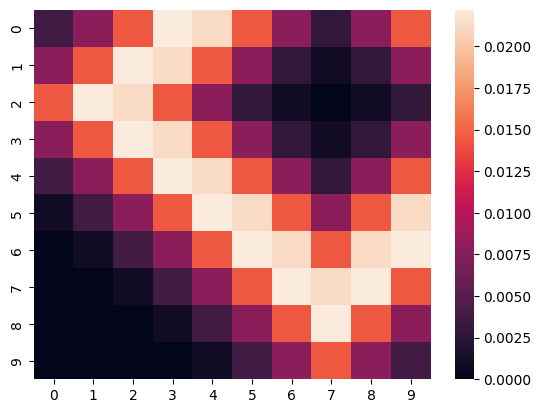

La celda con mas probabilidad de que este el fantasma es:  (0, 3)  con una probabilidad de:  0.022200772200772205
----------------------------------------------------
----------------------------------------------------
Sensor en la posicion:  (7, 7)  con color:  Y


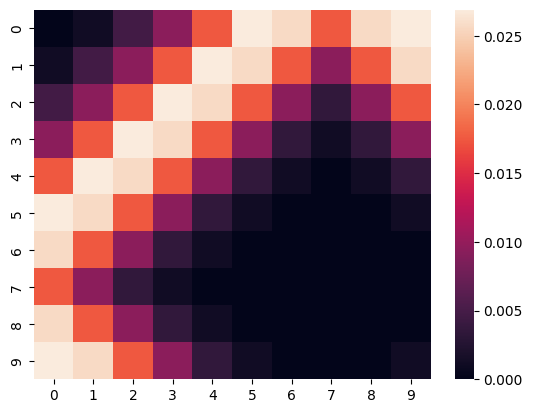

La celda con mas probabilidad de que este el fantasma es:  (0, 5)  con una probabilidad de:  0.026900584795321637


In [142]:
for trySensors in listTrySensors:
    print("----------------------------------------------------")
    print("----------------------------------------------------")
    # Imprime los datos de los sensores
    for sensor in trySensors:
        print("Sensor en la posicion: ", sensor[0], " con color: ", sensor[1])
    calcProb(trySensors)